
# Lecture IV: EXERCISES

In this exercises we will have a small look at how to use the libraries numpy and matplotlib in order to solve some famous physical mathematics problems.

### EXERCISE 0.1

Create a function that given an array $a$ and a float $L$ applies the following function $f(x)=20e^{-0.5(x-(L/2))^2/0.05}$ element wise and returns the resulting array.

### EXERCISE 0.2

Given a number of points N and a minimum and maximum position $xmin, xmax$, make a function that returns in an array a grid (N equidistant points) in between $[xmin,xmax]$. *Hint: You can Google if there is already any function doing this for you in numpy.*

### EXERCISE 0.3

Choose a certain float $L$, say $L=10$ and plot the previous function $f(x)$ for $x\in[0,L]$. *Hint: xmin=0, xmax=L*

### EXERCISE 0.4

Plot again the previous function now in the range $[-10, 20]$ but now plot it for M=20 possible values of $L$ in $[-8, 18]$.

You could do this in the same plot, certainly it will be a mess. You could do it using multiplot as well, but 20 plots is too much. So just do it in different plots one after the other one.

### EXERCISE 0.5

You have seen that Ex 0.4 results in a sequence where the gaussian fucntion $f(x)$ is "moving" towards positive x.
We can try to see this movement as a false animation if we clear the output of the cell each time we plot it.
To do this in a Jupyter Notebook, you can do clear_output(wait=True) after doing

`from IPython.display import clear_output`

If the plots are made too fast (the animation goes too fast) we can make the computer wait with `sleep()` from `form time import sleep`, inputing the number of seconds to stop there.

## Exercise 1: The Heat Diffusion Equation with Finite Differences

 Given the single spatial dimension heat diffusion equation (modelling the diffusion of heat/density of chemical species etc., propelled by the agglomeration of the same quantity with no source no leak) within the spatial region $x\in (0,L)$ and time $t\geq 0$:

 $$
\frac{\partial u(x,t)}{\partial t} = \kappa \frac{\partial^2 u(x,t)}{\partial x^2}
 $$

where $u(x,t)$ is the temperature or amount of chemical species at position $x$ in time $t$, while $\kappa$ is the diffusivity coefficient of the medium, which we will assume to be constant.

Now, let us make the following approximations for the partial derivatives using **finite differences**:

$$
\frac{\partial u(x,t)}{\partial t} \simeq \frac{u(x,t +\Delta t)-u(x,t)}{\Delta t}
$$

$$
\frac{\partial^2 u(x,t)}{\partial x^2} \simeq \frac{ u(x+\Delta x,t) -2u(x,t)+u(x-\Delta x,t)}{ \Delta x^2}
$$

As the time and spatial steps $\Delta t, \Delta x$ tend to zero, the approximations get each time better, following the definition of the derivative as the limit of the difference ratio. This means that if we choose small enough $\Delta t,\Delta x$, then the following approxiamtion of the differential equation might work for a numerical resolution:

$$
\frac{u(x,t +\Delta t)-u(x,t)}{\Delta t} = \kappa \frac{ u(x+\Delta x,t) -2u(x,t)+u(x-\Delta x,t)}{\Delta x^2}
$$


$$
u(x,t +\Delta t) = u(x,t)+\Delta t\ \Big[\kappa \frac{ u(x+\Delta x,t) -2u(x,t)+u(x-\Delta x,t)}{ \Delta x^2}\Big]
$$

$$
u(x,t +\Delta t) = \Big(1-2\kappa\frac{\Delta t}{\Delta x^2}\Big)\ u(x,t)+\kappa \frac{\Delta t}{\Delta x^2}\Big( u(x+\Delta x,t)+u(x-\Delta x,t)\Big)
$$


Thus, if we have an initial condition for the shape of $u(x,t)$, say we fix a known function $f(x)$ for $x\in(0,L)$ and we fix the boundaries at zero temperature (because there is a perfect ice bath at those points for example):

$$
u(x,t=0)=f(x)
$$

$$
u(x=0,t)=0\ \ \forall t\geq 0
$$
$$
u(x=L,t)=0\ \ \forall t\geq0
$$

Then we can obtain the shape of $u$ for the time $t=0+\Delta t$ as a function of the $u$ at time $t=0$ (which we know) and $\Delta x, \Delta t$, which we also know.

$$
u(x,\Delta t) = \Delta t\ \Big[u(x,0)+\kappa \frac{ u(x+\Delta x,0) -2u(x,0)+u(x-\Delta x,0)}{ \Delta x^2}\Big]
$$

If we divide the region $x\in [0,L]$ in $N$ pieces ($N+1$ points), then we will only consider the spatial points:

$$
x=j\Delta x \ \ for\ j=0,1,2,...,N
$$

$$
\Delta x = L/N
$$

We will only consider the temperature at those grid points for each time in $t=0, \Delta t, 2\Delta t, 3\Delta t...$.

Before going into the exercise, note that this approximate numerical solution is only valid if you choose $N, \Delta t, \kappa$ such that:

$$
\Delta t \leq \frac{\Delta x^2}{4\kappa}
$$

Otherwise, the approximation will diverge crazily.


**Exercise**: Make a simulator that computes the value for the temperature $u$ for each spatial point given the user inputs $\kappa, \Delta t, N, last\_time, L, f(x), plotEvery$ until it reaches a time bigger than $last\_time$. 

Every $plotEvery$ computed time iterations, plot the temperature profile.



***Spoilers:*** For this, first initialize the temperature vector, following the grid idea we have seen in the previous exercises. Then in each time iteration, you just need to use the equation to update the temperature vector:
$$
u(x,\Delta t) = \Delta t\ \Big[u(x,0)+\kappa \frac{ u(x+\Delta x,0) -2u(x,0)+u(x-\Delta x,0)}{ \Delta x^2}\Big]
$$

which in array language means, for each $i$ in the spatial grid, use the temperature in the previous time to compute the temperature in the next time for each point:

$$
u\_next\_time[i] = \Delta t\ \Big[u\_prev[i]+\kappa \frac{ u\_prev[i+1] -2u\_prev[i] +u\_prev[i-1]}{ \Delta x^2}\Big]
$$

Beware with the boundaries! For $i=0$ and the last $i$, there is no $[i-1]$ and $[i+1]$ respectively! But you do not need to be worried about the edges of the function, because for $u(x=0,t)=0=u(x=L,t)$ means $u[0]=0=u[N]$ at all times.

After each time you compute the new vector of values $u$, you can plot the temperature profile. In order to see a faster animation, you could make $\Delta t$ smaller, but it is better to do it by only ploting one frame per $plotEvery$ frames (check if the iteration counter is multiple of!). This is because playing with $\Delta t$ alters the quality of the approximation and the solution might diverge!

Also, you might see that the temperature suddenly goes to infinity. This is because numerical errors propagate through the approximations. There is a theorem though, by which if we make sure:

$$
\Delta t \leq \frac{\Delta x^2}{4\kappa}
$$

then the simulation will be stable for longer. You can make an assertion for this before simulating anything and raise an error else. 


**Possible Solution**:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output 
# This last import is a little trick to avoid ploting sequentially in Jupyter without erasing the previous frames

# User parameter declaration:

kappa=2.0
dt=0.00001
N=1000
last_time=1
L=10.0
plotEvery=1000

def f(x):
    return 20*np.exp(-0.5*(x-(L/2))**2/0.05)

In [8]:
def heat_Equation_Simulator(kappa, dt, N, last_time, L, f, plotEvery):
    # Compute the spatial grid width
    dx = L/N
    
    if dt>((0.25/kappa)*dx**2):
        raise ValueError(f"Unstable Region. Make dt smaller for this N and kappa. {dt}>{(0.25/kappa)*dx**2}")
    
    # Compute the x points
    x = np.array([ j*dx for j in range(0,N+1)])
    
    # Initialize the u array for the first iteration
    u_0 = np.array([ f(xj) for xj in x])
    
    # Initialize the array u for the next iterations as a zeros array
    u_1 = np.zeros(u_0.shape) # note that the first and last positions are always 0
    
    # Initialize time counter
    t=0
    iteration=0
    
    while t<last_time:
        # update time
        iteration+=1
        t=iteration*dt
        
        # Compute the temperatures for this new time at each position of the grid
        # Note that we dont need to change the value of the boundaries
        u_1[1:N] = (1-2*kappa*dt/dx**2)*u_0[1:N] + dt*kappa*( u_0[2:] + u_0[:(N-1)] )/dx**2
        
        # You could also have done it using for loops instead of treating them as vectors,
        # but that will be slower to compute. Try it though, it's a good practice.
        
        # Now, let us plot this time iteration
        
        if(iteration%plotEvery==0):
            clear_output(wait=True)
            plt.plot(x, u_1, 'o', label=f'u(x,t={round(t,4)})', markersize=2.5) # plot the points
            plt.legend() # to show the labels of the plots
            plt.xlabel('Position x')
            plt.ylabel('Temperature u')
            plt.ylim(0,10.1)
            plt.title(f'Time {round(t,4)} Evolution for Temperature using N={N} points in space and time step dt={dt}')

            # plt.savefig(f'C:/Users/oiang/Downloads/heatDiffusion_time_{t}.jpg', dpi=300) # the full path of the new image !NOTE that the bars must be / and not \ in Windows as well as in Linux
            plt.show() #!!!! it is NOT necessary to show the image in order to save it as jpg
            
        # Swap what we previously called previous iteration
        u_0 = u_1

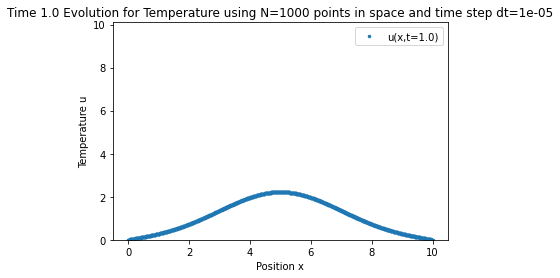

In [9]:
heat_Equation_Simulator(kappa, dt, N, last_time, L, f, plotEvery)

## Exercise 2: The Schrodinger Equation with Finite Differences

Given the Schrodinger Equation is the partial differential equation ruling the behaviour of a quantum particle in time, we can try to simulate the evolution of an electron in one dimension using a similar approach as the previous exercise. The equation is:

$$
i\hbar \frac{\partial \psi(x,t)}{\partial t} = -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} \psi(x,t) + U(x,t) \psi(x,t)
$$

where $\psi(x,t)$ is the wavefunction of the quantum particle. It is just a complex number per position in space and time $x,t$ such that according to Born's Rule, its magnitude squared $|\psi(x,t)|^2=\psi^*\psi$ gives us the probability to find the particle in that position.

We will consider again that the particle is bounded in a region of space $x \in [0,L]$ and we will consider times $t \geq 0$ such that we know the initial wavefunction (the initial distribution in space for the electron):

$$
\psi(x,t=0)=f(x)
$$

$$
\psi(0,t)=0\ \ \forall t\geq 0
$$
$$
\psi(L,t)=0\ \ \forall t\geq 0
$$

In the equation, $U(x,t)$ represents the potential energy field in which the particle is immersed. In this example we will assume it is time independent $U(x,t)=V(x)$.

Following the finite differences we casted in the previous exercise:

$$
\frac{\partial \psi(x,t)}{\partial t} \simeq \frac{\psi(x,t +\Delta t)-\psi(x,t)}{\Delta t}
$$

$$
\frac{\partial^2 \psi(x,t)}{\partial x^2} \simeq \frac{ \psi(x+\Delta x,t) -2\psi(x,t)+\psi(x-\Delta x,t)}{ \Delta x^2}
$$

Then, we can approximate numerically the Schrodinger Equation as:

$$
i\hbar \Big(\frac{\psi(x,t +\Delta t)-\psi(x,t)}{\Delta t}\Big) =  -\frac{\hbar^2}{2m} \frac{ \psi(x+\Delta x,t) -2\psi(x,t)+\psi(x-\Delta x,t)}{ \Delta x^2} + V(x) \psi(x,t)
$$

$$
\psi(x,t+\Delta t)=\Big( 1+\frac{\Delta t}{i\hbar}V(x)+\frac{\Delta t \hbar}{i m \Delta x^2} \Big)\psi(x,t) - \frac{\hbar \Delta t}{2im\Delta x^2}\Big( \psi(x+\Delta x,t)+\psi(x-\Delta x,t)\Big)
$$
Noting $1/i=-i$:

$$
\psi(x,t+\Delta t)=\Big( 1-\frac{i\Delta t}{\hbar}V(x)-\frac{i\Delta t \hbar}{ m \Delta x^2} \Big)\psi(x,t) + \frac{i\hbar \Delta t}{2m\Delta x^2}\Big( \psi(x+\Delta x,t)+\psi(x-\Delta x,t)\Big)
$$

This method will be unstable for many iterations, but we can tweak $\Delta t, \Delta x$ to make it stable for short time ranges.

If we divide the region $x\in [0,L]$ in $N$ pieces ($N+1$ points), then we will only consider the spatial points:

$$
x=j\Delta x \ \ for\ j=0,1,2,...,N
$$

$$
\Delta x = L/N
$$

We will only consider the wavefunction at those grid points for each time in $t=0, \Delta t, 2\Delta t, 3\Delta t...$.

Before going into the exercise, note that in python there are complex numbers. You just need to use $1j$ instead of the $i$ we used in the equations.

**Exercise**: Make a simulator that computes the value for the wavefunction $\psi$ for each spatial point, given the user inputs $\Delta t, N, last\_time, L, f(x), V(x), plotEvery$ until it reaches a time bigger than $last\_time$. You can assume it is an electron, by using atomic units $\hbar=1, m=1$. Every $plotEvery$ computed time iterations, compute the absolute squared value of the wavefunction and plot the probability to find the particle in each point together with the potential energy profile. You can also plot the real and imaginary parts and see their beauty.

**Possible Solution**:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output 
# This last import is a little trick to avoid ploting sequentially in Jupyter without erasing the previous frames

# User parameter declaration:

dt=0.000001
N=300
last_time=2
L=10.0
plotEvery=8000

def f(x, mu0=2.2, sigma=0.6, k0=0.0): # initially the particle will be a still gaussian distribution
    return (1/(pi*sigma**2))**(1/4)*exp(1j*k0*x-(x-mu0)**2/(2*sigma**2))

def V(x): # we will try a harmonic potential
    return 10*(x-(L/2))**2

In [11]:
def one_Quantum_Particle_in_1d_Simulator(dt, N, last_time, L, f, V, plotEvery):
    # Define the Planck Constant and the mass of the particle
    hbar=1
    m=1
    
    # Compute the spatial grid width
    dx = L/N
    
    # Compute the x points
    x = np.array([ j*dx for j in range(0,N+1)])
    
    # Compute the potential energy in those points
    pot = np.array([ V(xk) for xk in x])
    
    # Initialize the psi array for the first iteration
    psi_0 = np.array([ f(xk) for xk in x])
    
    # Initialize the array psi for the next iterations as a zeros array
    psi_1 = np.zeros(psi_0.shape, dtype=np.complex) # note that the first and last positions are always 0
    
    # Initialize time counter
    t=0
    iteration=0
    
    while t<last_time:
        # update time
        iteration+=1
        t=iteration*dt
        
        # Compute the temperatures for this new time at each position of the grid
        # Note that we dont need to change the value of the boundaries
        psi_1[1:N] = (1-1j*dt/hbar*pot[1:N]-1j*dt*hbar/(m*dx**2))*psi_0[1:N] + 1j*hbar*dt/(2*m*dx**2)*( psi_0[2:] + psi_0[:(N-1)] )
        
        # You could also have done it using for loops instead of treating them as vectors,
        # but that will be slower to compute. Try it though, it's a good practice.
        
        # Now, let us plot this time iteration
        
        if(iteration%plotEvery==0):
            # Compute the probability density
            probability = np.abs(psi_1)**2
            
            # Clear previous plots
            clear_output(wait=True)
            
            # Plot
            plt.plot(x, probability, '-', label=f'Probability(x,time={round(t,4)})', markersize=1.5) # plot the probability
            plt.plot(x, np.real(psi_1), '-', label=f'Real part', markersize=1.5) # plot the real part
            plt.plot(x, np.imag(psi_1), '-', label=f'Imaginary Part', markersize=1.5) # plot the imaginary part

            plt.ylim(-1.6,1.6)
            plt.ylabel('Probability Density |psi|**2')
            plt.legend()
            
            # In order to have the potential energy in a differnet y axis we use twinx
            plt.twinx()
            plt.plot(x, pot, '-', label=f'Potential Energy', markersize=1, color='grey') # plot the potential
            plt.ylabel('Potential Energy')
            
            plt.legend() # to show the labels of the plots
            plt.xlabel('Position x')
            plt.title(f'Time Evolution for Quantum Particle using N={N} points in space and time step dt={dt}')

            # plt.savefig(f'C:/Users/oiang/Downloads/schrodingerEvolution_time_{t}.jpg', dpi=300) # the full path of the new image !NOTE that the bars must be / and not \ in Windows as well as in Linux
            plt.show() #!!!! it is NOT necessary to show the image in order to save it as jpg
            
        # Swap what we previously called previous iteration
        psi_0 = psi_1

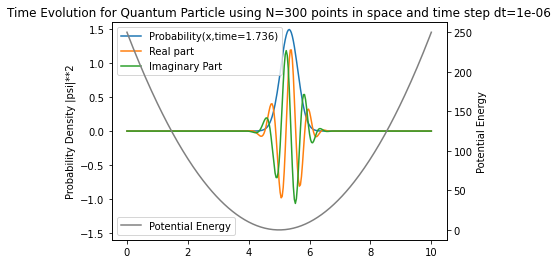

In [ ]:
one_Quantum_Particle_in_1d_Simulator(dt, N, last_time, L, f, V, plotEvery)

We can see the famous quantum tunneling at work if we set a potential energy profile that represents a physical wall, and we provide the electron an initial momentum.

In [ ]:
def f(x, mu0=1.5, sigma=0.6, k0=2.0): # the particle will be a moving gaussian distribution with momentum k
    return (1/(pi*sigma**2))**(1/4)*exp(1j*k0*x-(x-mu0)**2/(2*sigma**2))

def V(x, V0=10): # we will try a harmonic potential
    if x>4 and x<6:
        return V0
    else:
        return 0.0
    
one_Quantum_Particle_in_1d_Simulator(dt, N, last_time, L, f, V, plotEvery)